#Doenças Cardíacas:

Esse notebook é um projeto desenvolvido no curso **Data Science na Prática**, possui como finalidade o aprendizado de Data Visualization aplicados à um exemplo prático: **identificação de Doenças Cardíacas**.

As doenças cardíacas em si são **responsáveis por 380 mil mortes** todo ano, diante de tal problemática o *Machine Learning* pode ser utilizado com o objetivo de auxiliar a identificação de pacientes que possam sofrer dessa fatalidade de forma antecipada. Simplificando os esforços médicos para a estabilização do paciente.

Segundo a revista *Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* são capazes de **prever doenças cardiovasculares em até 5 anos.**

##Obtenção dos Dados:

Os dados utilizados nesse projeto foram coletados pela ***Cleveland Clinic Foundation*** e se encontram disponíveis no [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Nota-se que dados pessoais dos pacientes foram removidos com a finaldiade de garantir o anonimato.

Nesse Dataset foram registrados casos de 303 pessoas, em que foi coletado um total de 74 variáveis. Porém, para efeitos práticos e didáticos na aplicação do *Machine Learning* serão utilizados apenas 14 variáveis. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).




##Importação das Bibliotecas:

Começamos importando as bibliotecas essenciais para as análises iniciais, manipulações do Dataset e manipulações dos gráficos plotados.

In [0]:
#Importando as bibliotecas essenciais:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##Dataset de Sintomas e Patologias Cardiacas:

A primeira importação do Dataset é vinda do Github do professor Carlos Melo, o link disponibilizado por ele ja contém a formatação citada anteriormente (em que contém as 14 variáveis necessárias).

In [2]:
#Criando uma variável para o link do Dataset:
data_path = 'https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv'

#Pedindo ao Pandas para a leitura do arquivo ".csv":
df = pd.read_csv(data_path)

#Imprimindo os 5 primeiros termos:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##Dicionário de Variáveis:

Definir as variáveis do Dataset é essencial para uma boa estruturação do seu projeto, uma vez que, ao surgir uma duvida durante a análise, você verá a definição de cada variável.

* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

##Dataset de Mortes por Doenças Cardiacas no Brasil:

A segunda importação do Dataset é obtida através dos dados disponibilizados da Sociedade Brasileira de Cardiologia (SBC). Esses dados, além de estarem no próprio site da SBC, estão disponibilizados no Github.

In [3]:
#Link do Dataset:
data_path_brasil = 'https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv'

#Fazendo a Leitura do ".csv":
df_brasil = pd.read_csv(data_path_brasil)

#Corrigindo a ordem do Dataset para conter progressão de anos:
df_brasil = df_brasil.sort_values('ano',ascending=True).reset_index()
df_brasil.drop(labels='index', axis =1, inplace = True)

#Imprimindo os primeiros cinco termos:
df_brasil.head()

,ano,mortes_doencas_cardio
0,2004,285.543
1,2005,283.927
2,2006,302.817
3,2007,308.466
4,2008,317.797


##Correção na coluna 'num' do DataFrame df:
O dataset mostra que a variável num possui valores como: 0, 1, 2, 3 e 4. Sendo qualquer número a partir de 1 ser considerado uma doença cardiaca. Para rodarmos o codigo utilizaremos uma pequena correção que alterará os valores 2, 3 e 4 para 1.

In [0]:
df.loc[df.num != 0, 'num'] = 1

#Análise Exploratória:

A Análise Exploratória é composta por técnicas simples que buscam extrair ou ilustrar as informações contidas nos dados, sem conter nenhuma alteração significativa.

Com essa definição, utilizaremos da Visualização de Dados para aumentar a eficiência dessa exploração inicial.

##Q1. Qual o tamanho do DataFrame?

Esses informações sobre as dimensões do Data Frame ja foram ditos anteriormente, mas como fazemos para extrair essas informações utilizando a biblioteca Pandas?

In [5]:
#Imprimindo a quantidade de linhas (entradas):
print('Temos {} linhas/entradas de pacientes'.format(df.shape[0]))

#Imprimindo a quantidade de colunas (variáveis):
print('Temos {} colunas/fatores que são analisados'.format(df.shape[1]))

Temos 303 linhas/entradas de pacientes
Temos 14 colunas/fatores que são analisados


##Q2. Quais são os tipos dessas variáveis?

Podemos identificar de duas formas os tipos de variáveis do nosso Data Frame, o primeiro método é utilizando a função: ".dtypes" e, a segunda: ".info()".

Ao utilizar ".info()" obtemos outras informações que são interessantes, mas não para esse momento inicial.

In [6]:
#Identificando os tipos de variáveis:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

Nesse Dataset percebemos que estamos trabalhando apenas com valores numericos, não há objetos que necessitam de correção.

##Q3. Como que está a distribuição dessas variáveis?

Agora precisamos ver o comportamento das nossas variáveis, o quanto elas variam em suas distribuições. Para isso podemos utilizar a função ".describe()" que nos retorna:

* `count` - Quantidade de valores contados;
* `mean` - A média aritmética;
* `std` - O Desvio Padrão (Standard Deviation);
* `min`- Valor Mínimo;
* `25%` - Primeiro quartil (os 25% menores valores);
* `50%` - Segundo quartil ou mediana (os 50% menores valores);
* `75%` - Terceiro quartil (os 75% menores valores);
* `max` - Valor Máximo.

Um outro método que pode vir a ser utilizado é a impressão (plot) de histogramas das variáveis. A adoção desse histogramas nos tras uma resposta mais visual.

Ambos os metodos são interessantes pois ".describe()" é melhor para descrever as bordas (valores minimos, media, mediana e máximos). Enquanto que o histograma é visualmente mais fácil de identificar a disperções dos valores.

###Função Describe:

In [7]:
#Utilizando a função ".describe()" com arredondamento de 2 casas decimais:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.66,4.72,0.46
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,0.93,1.94,0.50
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,1.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,1.00


###Plot de Histogramas do Dataset:

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba6cfb7390>,
      dtype=object)

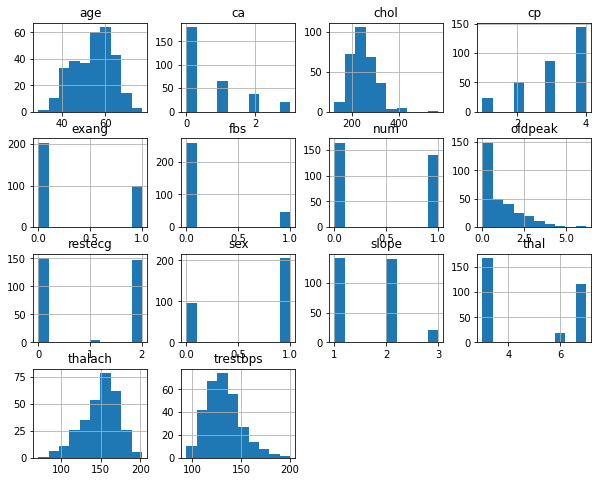

In [8]:
#Impressão dos histogramas de todas as variáveis númericas:
df.hist(figsize = (10,8))

### Verificação de oldpeak:

Durantea visualização dos histogramas, reparei que a variável `oldpeak`apresentou alguns valores fora do esperado, para verificar melhor esse comportamento, utilizaremos o boxplot para entender esse um pouco melhor esse comportamento:

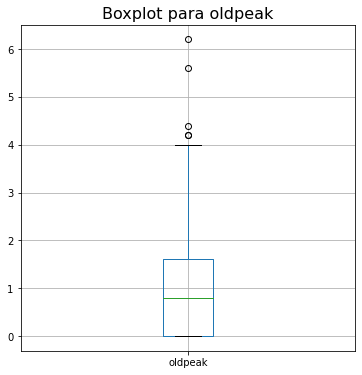

In [34]:
#Imprimindo o boxplot para oldpeak:
df.boxplot(column='oldpeak', figsize = (6,6))

plt.title('Boxplot para oldpeak', fontsize = 16)

plt.show();

##Q4. Como está a segmentação de pessoas com doenças cardiacas?

Após aquela correção inicial de converter todos os valores acima de 1 para 1 (separando a pessoa que terá doença cardíaca das que não tem), vamos ver quantas pessoas no nosso Dataset possuem Doenças Cardíacas:

###Descobrindo a quantidade:

Para descobrir quantas vezes um determinado valor ocorre em uma coluna, utilizamos a função ".value_counts()":

In [10]:
#Imprimindo as pessoas com Doença Cardíaca e sem Doença Cardíaca:
print('Pessoas sem Doença Cardiaca: {}'.format(df.num.value_counts()[0]))
print('Pessoas com Doença Cardiaca: {}'.format(df.num.value_counts()[1]))

Pessoas sem Doença Cardiaca: 164
Pessoas com Doença Cardiaca: 139


###Imprimindo essa diferença num gráfico de pizza:

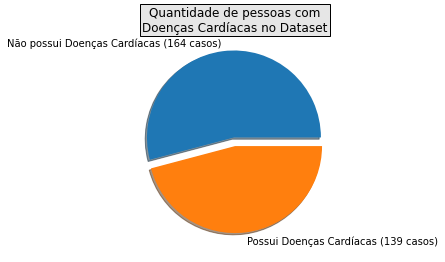

In [11]:
#Separando uma fatia da outra:
explode = (0.1, 0)

#Definindo os registros:
labels = ['Não possui Doenças Cardíacas ({} casos)'.format(df.num.value_counts()[0]),
          'Possui Doenças Cardíacas ({} casos)'.format(df.num.value_counts()[1])]

#Utilizando o Pyplot para a criação de um gráfico do tipo Pizza:
fig, ax = plt.pie(df.num.value_counts(), labels = labels,
                  explode = explode, shadow = True)

#Inserindo um Título para a imagem em caixa:
plt.title('Quantidade de pessoas com\n'+'Doenças Cardíacas no Dataset', bbox = {'facecolor':'.9', 'pad':2})

#Mostrando o resultado:
plt.show()

##Q5. Existem Variáveis Nulas?

Outro fator que nos devemos sempre atentar é sobre a quantidade de valores faltantes ou a presença de variáveis nulas. Para essa verificação utilizamos a função ".isnull()" para retornar um valor Verdadeiro (`True` ou 1) para entradas nulas ou Falso (`False` ou 0) para variáveis que possuem valor.

No final disso, somamos todos os valores e dividimos pelo tamanho do Dataset. Assim, **obtemos a porcentagem de valores nulos existentes.**

In [12]:
#Obtendo a porcentagem de valores nulos para as variáveis:
df.isnull().sum()/df.shape[0]

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

Aqui podemos observar que não há valores faltantes ou nulos.

##Q6. Qual a quantidade de pessoas que morreram por Doenças Cardíacas no Brasil?

Para entendermos melhor a importância desse cenário de Doenças Cardíacas, será utilizado aqui o Dataset disponibilizado pela Sociedade Brasileira de Cardiologia.

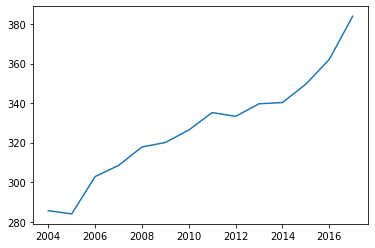

In [13]:
#Imprimindo gráfico do tipo linha:
plt.plot(df_brasil.ano, df_brasil.mortes_doencas_cardio);

##Q7. Qual a quantidade de homens e mulheres?

Afinal, quantos homens e mulheres estão presentes nesse dataset?

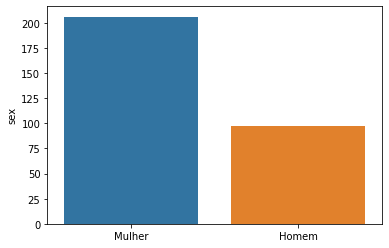

In [14]:
#Imprimindo um gráfico de barra comparando a quantidade de homens e mulheres:
sns.barplot(x = ['Mulher','Homem'], y = df.sex.value_counts());

##Q8. Como é a dispersão do Colesterol Sérico ao decorrer da idade?

O Colesterol Sérico é um dos responsáveis pelo estreitamento e endurecimento de artérias, podendo ser um fator determinante para problemas cardíacos. Esse é um fator que se relaciona diretamente com a idade?

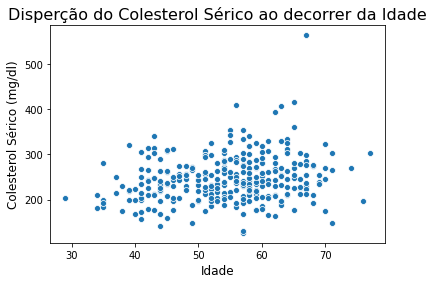

In [36]:
#Imprimindo um gráfico de Dispersão entre idade e a quantidade de Colesterol Sérico no sangue:
sns.scatterplot(x = df.age, y = df.chol)

#Formatando as Legendas:
plt.title('Disperção do Colesterol Sérico ao decorrer da Idade', fontsize = 16)
plt.xlabel("Idade", fontsize = 12)
plt.ylabel("Colesterol Sérico (mg/dl)", fontsize = 12)

#Mostrando o resultado:
plt.show();

##Q9. Qual a dispersão desse Colesterol Sérico?

Afinal, qual é o intervalo dessa variável que podemos considerar comum a quantidade desse colesterol?

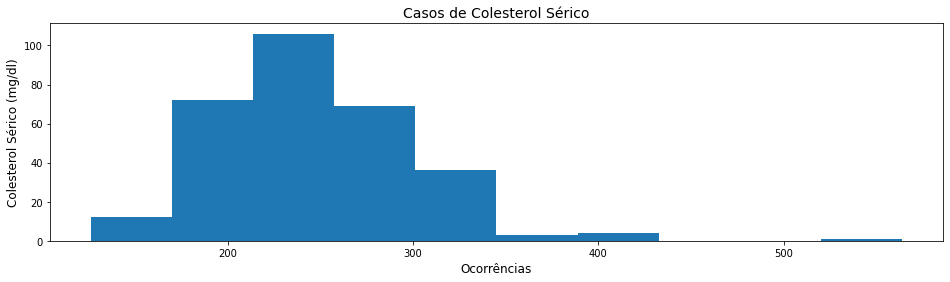

In [16]:
#Criando a figura utilizando o pyplot:
fig, ax = plt.subplots(figsize = (16,4))

#Selecionando o tipo histograma como plot:
df.chol.plot(kind = 'hist', ax = ax)

#Inserindo as legendas:
ax.set_title('Casos de Colesterol Sérico', fontsize = 14)
ax.set_xlabel('Ocorrências', fontsize= 12)
ax.set_ylabel('Colesterol Sérico (mg/dl)', fontsize= 12)

#Aproveitando o máximo do espaçamento:
plt.tight_layout;

##Q10. Quais são os resultados do Eletrocardiografia de repouso? (resteg)

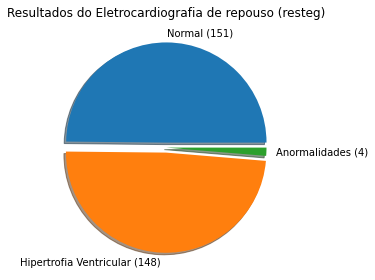

In [41]:
#Criando a figura:
fig, ax = plt.subplots(figsize = (10,4))

#Separando visualmente as variáveis:
explode = (0.05, 0.05, 0)

#Corrigindo as legendas:
labels = ['Normal ({})'.format(df.restecg.value_counts()[0]), 
          'Hipertrofia Ventricular ({})'.format(df.restecg.value_counts()[2]),
          'Anormalidades ({})'.format(df.restecg.value_counts()[1])]
plt.title("Resultados do Eletrocardiografia de repouso (resteg)")

#Inserindo os valores:
ax.pie(df.restecg.value_counts(), explode = explode,
       labels = labels, shadow = True)

#Aproveitando o máximo do espaçamento:
plt.tight_layout();

##Q11. Qual o coeficiente de Pearson entre cada variável?

Esse coeficiente de Pearson utiliza uma escala entre -1 a 1 para identificar o grau de correlação entre as variáveis, podendo nos indicar uma possível causa e efeito.

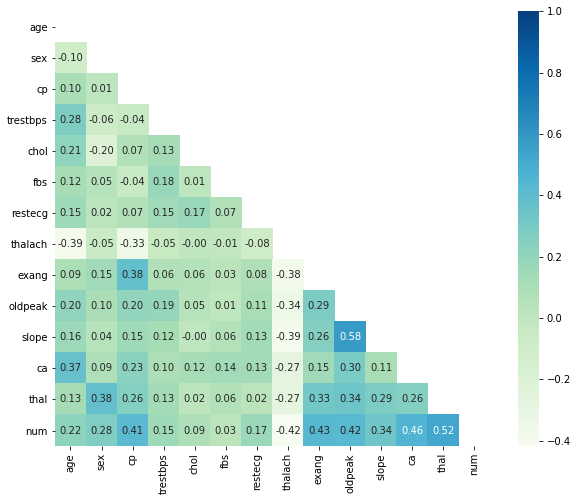

In [18]:
fig, ax = plt.subplots(figsize = (10,8))

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(df.corr(), mask = mask, cmap = 'GnBu', fmt = '.2f', square = True, annot = True, ax = ax)

#Conclusões:

Como dito anteriormente, o principal objetivo desse notebook é começar a praticar sobre Visualização de Dados utilizando um caso prático. Aqui podemos ver algumas das utilizações do Pyplot e Seaborn, principalmente.

Esse atual notebook tem como finalidade a possibildiade de consulta futura.